In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [15]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

In [20]:
# Exploratory Precipitation Analysis
inspector = inspect(engine)
print('Measurement Table')
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column['name'], column['type'])

print('\n')

print('Station Table')
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column['name'], column['type'])

Measurement Table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


Station Table
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

The most recent data point: ('2017-08-23',)
One year from ('2017-08-23',) is 2016-08-23 00:00:00


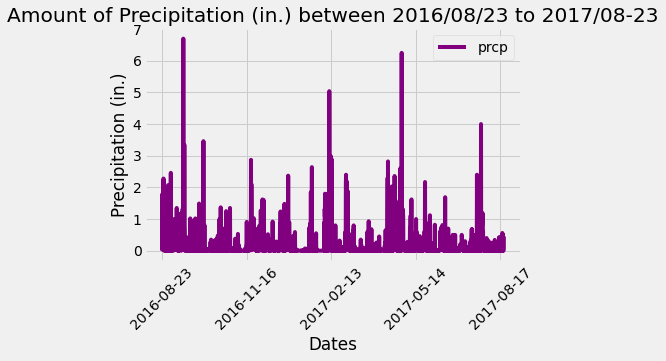

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The most recent data point: {most_recent_data_point}')

# Calculate the date one year from the last date in data set.
one_year_from_last = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(f'One year from {most_recent_data_point} is {one_year_from_last}')

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').all()
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.set_index('date').sort_values(by='date', ascending=True).dropna()
prcp_df.head()
prcp_df.plot(rot=45, color='purple', title='Amount of Precipitation (in.) between 2016/08/23 to 2017/08-23', xlabel="Dates", ylabel="Precipitation (in.)")
plt.savefig("precipitation_bar_graph.png")
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [147]:
# Exploratory Precipitation Analysis
print('Measurement Table')
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column['name'], column['type'])

print('\n')

print('Station Table')
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column['name'], column['type'])

Measurement Table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


Station Table
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [148]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
print(f"Total number of stations: {station_count}")

Total number of stations: 9


In [156]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [158]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(Measurement.tobs),
func.max(Measurement.tobs),
func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

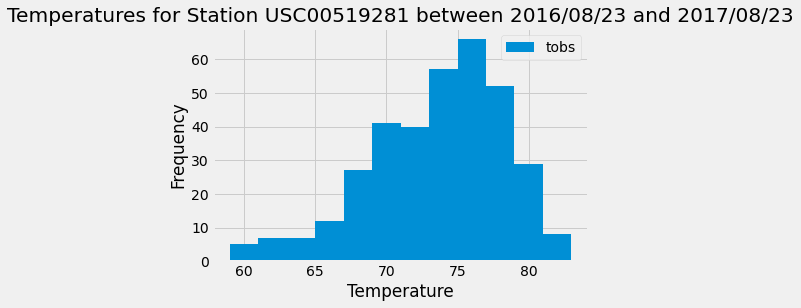

In [162]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
filtered = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>="2016-08-23"). \
filter(Measurement.date<="2017-08-23").filter(Measurement.station == station_number).all()

filtered_df = pd.DataFrame(filtered)

observation_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.title("Temperatures for Station USC00519281 between 2016/08/23 and 2017/08/23")
plt.savefig("images/temperature_histo.png")


# Close session

In [163]:
# Close Session
session.close()